# Extracción de palabras clave

Este notebook preprocesa una cadena de texto para extraer conocimiento de ésta.

El preprocesamiento consiste en una serie de pasos que se describen a continuación:
1. Convierte todas las palabras minúsculas.
2. Remueve signos de puntuación ```[?,!,',",#,:,_,.,,,(,),\,/,-,*]```.
3. Normaliza los espacios (convierte espacidado doble, triple, cuadruple, ... en un espaciado simple).
4. Convierte la cadena de texto en una lista de palabras separadas por espacio.
5. Remueve las "stopwords" de la lista de palabras.
4. Lemmatiza las palabras restantes.

## Lectura de datos

In [1]:
import glob
import os

list_files = glob.glob(os.getcwd()+"\\text_files\\*.txt")
list_files

['c:\\Users\\chccr\\Dropbox\\Maestría MCD\\MCD Procesamiento y clasificación de datos\\Procesamiento y clasificación de datos\\HW1 Preprocesamiento de datos\\text_files\\dramatization_longfellow.txt',
 'c:\\Users\\chccr\\Dropbox\\Maestría MCD\\MCD Procesamiento y clasificación de datos\\Procesamiento y clasificación de datos\\HW1 Preprocesamiento de datos\\text_files\\nick_carter_stories.txt']

In [2]:
import re

f = open(list_files[0], "r", encoding="utf-8")
all_text = f.read()
f.close()

book_info = "Title: "+re.split("Title: ", all_text)[1]
book_info = re.split("\*{3}", book_info)[0]
print("OBRA SELECCIONADA:")
print(book_info[:-2])

OBRA SELECCIONADA:
Title: A dramatization of Longfellow's Hiawatha
       A spectacular drama in six acts

Authors: Henry Wadsworth Longfellow
         A. L. De Vine

Release Date: January 12, 2022 [eBook #67148]

Language: English

Produced by: Charlene Taylor and the Online Distributed Proofreading
             Team at https://www.pgdp.net (This file was produced from
             images generously made available by The Internet
             Archive/American Libraries.)


In [3]:
print(all_text)

The Project Gutenberg eBook of A dramatization of Longfellow's
Hiawatha, by Henry Wadsworth Longfellow

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: A dramatization of Longfellow's Hiawatha
       A spectacular drama in six acts

Authors: Henry Wadsworth Longfellow
         A. L. De Vine

Release Date: January 12, 2022 [eBook #67148]

Language: English

Produced by: Charlene Taylor and the Online Distributed Proofreading
             Team at https://www.pgdp.net (This file was produced from
             images generously made available by The Internet
             Archive/American Librar

## Recorta texto

El libro de texto es recortado para solo contener el cuerpo de la obra, con esto se quita la información referente a la editorial, fundación gutenberg, etc.

In [4]:
all_text = re.split("\*{3}", all_text, maxsplit=2)[2]
all_text = re.split("\*{3}", all_text)[0]
print(all_text)







Transcriber’s Notes:

  Underscores “_” before and after a word or phrase indicate _italics_
    in the original text.
  Small capitals have been converted to SOLID capitals.
  Typographical and punctuation errors have been silently corrected.




                         A DRAMATIZATION OF
                            LONGFELLOW’S

                              HIAWATHA.

                  A Spectacular Drama in Six Acts.

             Delineating the Characteristics and Customs
                                 OF
                  THE NATIVE NORTH AMERICAN INDIAN.


           _Re-written, Revised, Arranged and Dramatized
                        By A. L. DE VINE._

      _Entered According to Act of Congress in the Year 1895
                          By A. L. DE VINE.
    In the Office of the Librarian of Congress at Washington._

                        ALL RIGHTS RESERVED.

      _Copyrighted in Great Britain and British Possessions,
                       France, Germany, Ita

## Importando las "stopwords" y el lematizador

En esta sección se importa un set de "stopwords" que será utilizada para la remoción de éstas del cuerpo de texto. Se importa un lematizador que procesará las palabras restantes, éstas se encuentran dentro de la biblioteca nltk.

In [5]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))
print(stop)

{'own', 'that', 'for', 'theirs', 'very', 'yourself', 'didn', "you're", "shan't", 'don', 'his', 'the', 'those', 'mustn', 'with', 'does', 'doesn', 'hadn', 'or', "she's", 'd', 'during', 'some', 'had', 'each', 'an', 'before', 'few', 'herself', "it's", 'my', 'more', 'hers', 'over', 'at', 'has', 'having', 'needn', "you'll", "wouldn't", 'there', 'me', 'nor', 'because', "wasn't", 'out', 'ours', 'yours', 'who', "that'll", 'shan', 'her', 'm', 'here', 'up', 's', 'myself', 'itself', 'been', 'as', 'ma', 'i', 'were', 'will', 'between', 'can', 'only', 'not', 've', 'any', "aren't", 'both', "hadn't", 'once', 'where', 'this', 'you', 'themselves', 'have', 'while', 'being', 'couldn', "didn't", 'aren', 'in', 'isn', 'is', "couldn't", "mustn't", 'about', 'your', 'its', 'again', 'they', 'just', 're', 'our', 'am', 'll', 'ourselves', 'wouldn', 'what', "needn't", 'them', 'haven', 'be', 'of', "doesn't", "haven't", 'she', 'whom', 'we', 'him', 'then', 'himself', 'when', 'now', 'are', 'such', 'no', 'into', "isn't", 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chccr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

## Funcion para preprocesar texto

In [7]:
def preprocesamiento_words(sentence):
    # Palabras a minusculas
    sentence = sentence.lower()
    
    # Borra urls del documento
    cleanr = re.compile('(http|https)://[^\s]*')
    sentence = re.sub(cleanr,"",sentence)
    sentence = re.sub("www[^\s]*", "", sentence)

    # Removing Punctuations u otros caracteres
    sentence = re.sub(r'[?|!|\'|\"|#|:|“|”|_*]', r'', sentence)
    sentence = re.sub(r'[.|,|)|(|\|/|\**|\-*]', r'', sentence)
    
    # Normaliza los espacios
    sentence = re.sub(r' +', r' ', sentence)
    
    # Separa oracion en palabras, remueve stopwords y lematiza
    words = [lemmatizer.lemmatize(word) for word in sentence.split() if word not in stop]
    return words

In [8]:
# Crea la lista de palabras preprocesadas
all_words = preprocesamiento_words(all_text)

# Imprime resultado
print("Palabras totales:",len(all_words))
print("Imprime 100 palabras de toda la lista:\n")
print(all_words[:100])

Palabras totales: 4428
Imprime 100 palabras de toda la lista:

['transcriber’s', 'note', 'underscore', 'word', 'phrase', 'indicate', 'italic', 'original', 'text', 'small', 'capital', 'converted', 'solid', 'capital', 'typographical', 'punctuation', 'error', 'silently', 'corrected', 'dramatization', 'longfellow’s', 'hiawatha', 'spectacular', 'drama', 'six', 'act', 'delineating', 'characteristic', 'custom', 'native', 'north', 'american', 'indian', 'rewritten', 'revised', 'arranged', 'dramatized', 'l', 'de', 'vine', 'entered', 'according', 'act', 'congress', 'year', '1895', 'l', 'de', 'vine', 'office', 'librarian', 'congress', 'washington', 'right', 'reserved', 'copyrighted', 'great', 'britain', 'british', 'possession', 'france', 'germany', 'italy', 'belgium', 'denmark', 'portugal', 'switzerland', 'introductory', 'ye', 'whose', 'heart', 'fresh', 'simple', 'faith', 'god', 'nature', 'believe', 'age', 'every', 'human', 'heart', 'human', 'even', 'savage', 'bosom', 'longing', 'yearning', 'striv

## Frecuencia de palabras

In [9]:
from collections import Counter
import pandas as pd

# Cuenta la frecuencia de palabras de la lista
words_count = Counter(all_words)

# Crea dataframe
table = pd.DataFrame({"words": words_count.keys(),
                     "Count": words_count.values()})
table.set_index("words", inplace=True)

# Organiza las palabras por valor de frecuencia
table.sort_values("Count", ascending=False, inplace=True)

# Imprime top-200 palabras
print(list(table.index[:200]))

['hiawatha', 'minnehaha', 'act', 'nokomis', 'indian', 'water', 'scene', 'upon', 'forest', 'old', 'laughing', 'land', 'great', 'hand', 'arrowmaker', 'u', 'heart', 'people', 'famine', 'hiawatha’s', 'wigwam', 'gitche', 'fever', 'like', 'tribe', 'dance', 'river', 'fall', 'come', 'song', 'peace', 'woman', 'light', 'father', 'life', 'seen', 'description', 'food', 'guest', 'may', 'soft', 'dacotahs', 'manito', 'sunshine', 'love', 'face', 'lake', 'red', 'first', 'pipe', 'doorway', 'behind', 'nation', 'little', 'beloved', 'foot', 'ah', 'among', 'together', 'sat', 'go', 'see', 'scenery', 'distance', 'back', 'given', 'arrow', 'curtain', 'still', 'bring', 'farewell', 'away', 'shall', 'thou', 'canoe', 'made', 'child', 'hiawatha;', 'heaven', 'feast', 'word', 'tree', 'rock', 'maiden', 'till', 'mighty', 'know', 'paupukkeewis', 'algonquin', 'lovely', 'round', 'deer', 'handsome', 'smoke', 'lay', 'eye', 'welcome', 'daughter', 'look', 'silence', 'give', 'looked', 'long', 'o’er', 'dead', 'nearer', 'spirit',

## Barplot

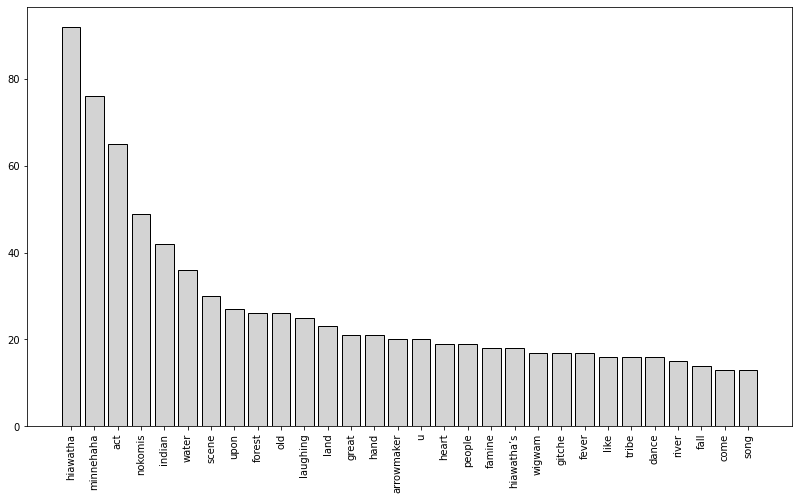

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(19.2/1.4,10.80/1.4))
plt.bar(x=list(table.index)[:40],
        height=table["Count"].values[:40],
        edgecolor="black",
        width=0.8,
        color="lightgray")
plt.xticks(rotation = 90)
plt.show()

## Wordcloud

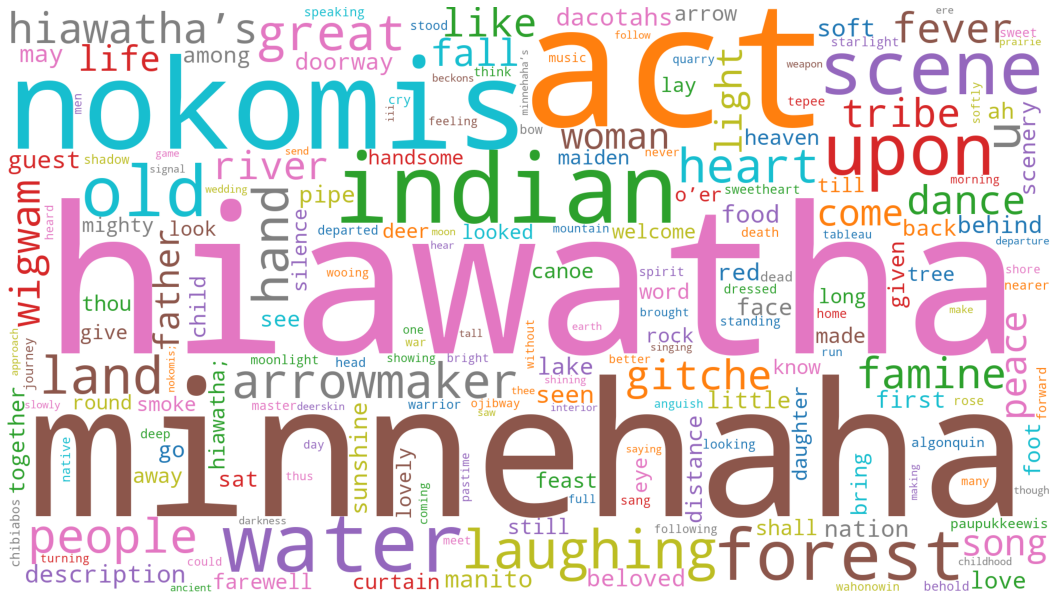

In [11]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

plt.figure(figsize=(19.2,10.80))
wordcloud = WordCloud(width=1920,
                      height=1080,
                      max_words=200,
                      background_color="white",
                      colormap="tab10").generate_from_frequencies(words_count)

plt.axis('off')
plt.imshow(wordcloud)
plt.show()